In [1]:
import eda_tools as eda
import numpy as np

#### Полезные ссылки

- Ace of data interview - data science book
- https://github.com/sinclam2/fifty-challenging-problems-in-probability/blob/master/01-Solution.ipynb
- https://www.nicksingh.com/posts/40-probability-statistics-data-science-interview-questions-asked-by-fang-wall-street
- примеры задач компаний из check-папки

### На что обращать внимание

1) Частая ошибка - забываем множитель сочетаний при расчете вероятностей. Обратить внимание является ли схема биноминальной.  
2) при сложных расчетах обращать внимание на возможность симметрии - мб это упростит задачу  
3) задачи с условными вероятностями - иногда кажется что конкретная вероятность зависит от предыдущих, но  
если мы не фиксируем условную вероятность то возможно считать как независимые (задача 15)
Особенно это актуально при расчете среднего (см пояснения к этой задаче)

**Tips**:
пусть p(xi) - вероятность посадки на i-м месте (до этого люди как то уже сели)  
xi_avg = xi * p(xi|prev1) * p(prev1) + ... xi * p(xi | prevk) * p(prevk)  
ср значение xi - взвешено по всем вероятностям наступления xi при условии пред конфигураций посадки prev  
Но тогда xi_avg = xi * sum(p(xi|prevk)p(prevk)) = xi * p(xi) по формуле полной вероятности  
Пред. конфигурации складываются в независимую безусловную вероятность наступления xi

#### fifty-challenging-problems

dist sum  0.9998681382170593
avg N untill success  5.9927476019382695


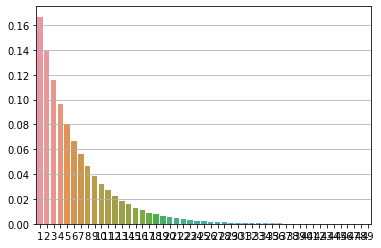

In [23]:
# 3) сколько в ср раз кинуть кубик пока не выпадет 6
# аналог распределения бернулли
p, q = 1/6, 5/6
x = list(range(1, 50))
dist = []
for j in x:
    dist.append(p * q**(j-1))
print('dist sum ', sum(dist))
print('avg N untill success ', np.sum(np.array(x) * np.array(dist)))
print('чтобы суммировать аналитичически достаточно вспомить что 1/(1-x) производная даст нужный ряд')
eda.make_plot('bar', {'x' : x, 'y' : dist})

In [14]:
# 10) У вашего друга есть много чёрных и белых шаров, и он кладёт в урну чёрные и белые шары по своему усмотрению. 
# Вы выбираете «чёрный» или «белый». Из урны случайно вытаскивается один шар. 
# Запишите максимальную сумму, которую вы готовы заплатить за участие в этой игре. 
# Игра проводится только один раз.

# p(w) = 2 * p(белый) * p = p (из за симметрии, домножаем на 2 для кейса с черным выбором) 
# p = sum(p(вытащить белый из N когда X белых) * p(друг запланировал X белых) * p(друг запланировал N шаров))  
# p = sum(x/N * 1/(N+1)) суммируем по N = 1, inf; x = 0, N (поэтому n+1 вариант для каждого N)
p = 0
Max_N = 1000 # с ростом выходим на насыщение
for N in range(1, Max_N): # число шаров в корзине
    for x in range(0, N+1): # число белых шаров
        p += x/N * 1/(N+1) * 1/Max_N # тотал шанс угадать белый шар
print('res', p)

# или еще проще - здесь полная симметрия, а значит нет преимуществ выбора белого/черного. p = 1/2
# чуть сложнее - пусть СВ f_b - доля выбора черных шаров. тогда доля белых 1 - f_b
# p(win) = p(black) * f_b + p(white) * (1-f_b) = 1/2, т к p(white) = p(black) = 1/2

res 0.4995000000000076


In [9]:
# 14) Купоны в коробках с хлопьями пронумерованы от 1 до 5, и для получения приза 
# нужно собрать по одному экземпляру каждого номера.В каждой коробке — один купон. 
# Сколько коробок в среднем нужно купить, чтобы собрать полный набор?

# если я купил x коробок, то шанс что соберу 1-5 купонов: p = 1 * 1/(x-1) * ... 1/(x-4)
# тогда <x> = sum(x * p), x = (5, inf)  
x_max = 1000
p = 0
for x in range(5, x_max+1):
    p += x / ((x-1) * (x-2) * (x-3) * (x-4))
print(p / 0.05555555522021383)

5.499990981991038


15) Восемь подходящих женихов и семь красивых моделей случайно купили одиночные билеты 
в один и тот же 15-местный ряд театра. 
В среднем, сколько пар соседних мест окажутся заняты "брачными парами"?

Итак, у нас 15 мест, а значит 14 пар мест которые друг рядом с другом. Пусть хi - это состояние i-пары.  
Если xi=1 то там есть матч, если xi=0 то нет.  Тогда cnt = x1 + ... + x14 - случайное число матчей.  
(!) вероятность матча xi не зависит от других j!=i (у нас НЕТ условия на то как они распределены)  
Поэтому для любого i: xi_avg = 1 * (7/14 * 8/15 + 8/14 * 7/15) = 8/15  
Тогда cnt_avg = 14 * xi_avg = 8 * 14 / 15 ~ 7.4  

**Tips**:
пусть p(xi) - вероятность посадки на i-м месте (до этого люди как то уже сели)  
xi_avg = xi * p(xi|prev1) * p(prev1) + ... xi * p(xi | prevk) * p(prevk)  
ср значение xi - взвешено по всем вероятностям наступления xi при условии пред конфигураций посадки prev  
Но тогда xi_avg = xi * sum(p(xi|prevk)p(prevk)) = xi * p(xi) по формуле полной вероятности  
Пред. конфигурации складываются в независимую безусловную вероятность наступления xi

In [19]:
8 * 14 / 15 

7.466666666666667